# **Financial Risk For Loan Approval**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.model_selection import train_test_split

#for evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#models
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# **Reading and Understanding the Data**

In [ ]:
df = pd.read_csv('/content/Loan.csv')

In [ ]:
df.head()

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
0,2018-01-01,45,39948,617,Employed,Master,22,13152,48,Married,...,3329.000000,0.724972,11,126928,0.199652,0.227590,419.805992,0.181077,0,49.0
1,2018-01-02,38,39709,628,Employed,Associate,15,26045,48,Single,...,3309.083333,0.935132,3,43609,0.207045,0.201077,794.054238,0.389852,0,52.0
2,2018-01-03,47,40724,570,Employed,Bachelor,26,17627,36,Married,...,3393.666667,0.872241,6,5205,0.217627,0.212548,666.406688,0.462157,0,52.0
3,2018-01-04,58,69084,545,Employed,High School,34,37898,96,Single,...,5757.000000,0.896155,5,99452,0.300398,0.300911,1047.506980,0.313098,0,54.0
4,2018-01-05,37,103264,594,Employed,Associate,17,9184,36,Married,...,8605.333333,0.941369,5,227019,0.197184,0.175990,330.179140,0.070210,1,36.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ApplicationDate             20000 non-null  object 
 1   Age                         20000 non-null  int64  
 2   AnnualIncome                20000 non-null  int64  
 3   CreditScore                 20000 non-null  int64  
 4   EmploymentStatus            20000 non-null  object 
 5   EducationLevel              20000 non-null  object 
 6   Experience                  20000 non-null  int64  
 7   LoanAmount                  20000 non-null  int64  
 8   LoanDuration                20000 non-null  int64  
 9   MaritalStatus               20000 non-null  object 
 10  NumberOfDependents          20000 non-null  int64  
 11  HomeOwnershipStatus         20000 non-null  object 
 12  MonthlyDebtPayments         20000 non-null  int64  
 13  CreditCardUtilizationRate   200

In [ ]:
df.isna().sum()

,0
ApplicationDate,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0


**Removing Unwanted Columns**

In [ ]:
df=df.drop('ApplicationDate',axis=1)

In [ ]:
df.shape

(20000, 35)

In [ ]:
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


# **Analysis Based on Important Features**

In [ ]:
# Define target and features
X = df.drop(columns=['LoanApproved'])  # Drop target and unnecessary ID-like column
y = df['LoanApproved']

**Creating top 10 important feature**

In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# One-Hot Encoding of categorical variables
X_encoded = pd.get_dummies(X, drop_first=True)  # Use get_dummies for One-Hot Encoding

# Calculate Mutual Information
mutual_info = mutual_info_classif(X_encoded, y, random_state=42)

# Create DataFrame for feature importance
mutual_info_df = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Importance': mutual_info
}).sort_values(by='Importance', ascending=False)

# Top 10 features
top_10_features = mutual_info_df.head(10)

print("Top 10 Features:\n", top_10_features)



Top 10 Features:
                    Feature  Importance
28               RiskScore    0.525761
27  TotalDebtToIncomeRatio    0.231755
20           MonthlyIncome    0.205635
1             AnnualIncome    0.203096
25            InterestRate    0.055664
4               LoanAmount    0.038688
24        BaseInterestRate    0.033921
23                NetWorth    0.023427
26      MonthlyLoanPayment    0.022546
2              CreditScore    0.013929


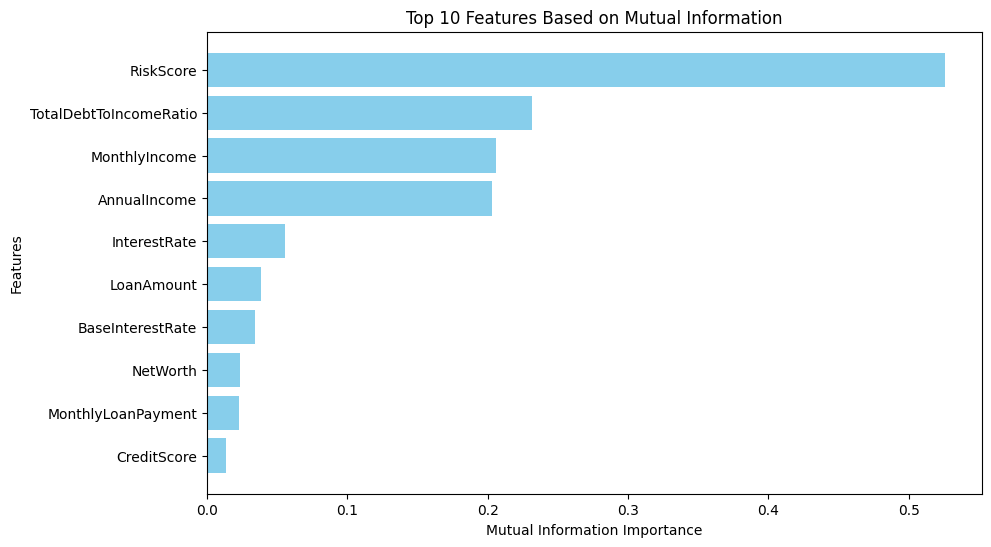

In [ ]:
# Step 5: Plot the Top 10 Features
plt.figure(figsize=(10, 6))
plt.barh(top_10_features['Feature'], top_10_features['Importance'], color='skyblue')
plt.xlabel("Mutual Information Importance")
plt.ylabel("Features")
plt.title("Top 10 Features Based on Mutual Information")
plt.gca().invert_yaxis()  # Invert y-axis to show the most important feature at the top
plt.show()


In [ ]:
# Top selected features from previous analysis
selected_features = ['RiskScore', 'TotalDebtToIncomeRatio', 'MonthlyIncome', 'AnnualIncome',
                     'InterestRate', 'LoanAmount', 'BaseInterestRate', 'MonthlyLoanPayment',
                     'NetWorth', 'CreditScore']


# **Dataset Subset for Selected Features**

First, focus only on the selected features and the target variable

In [ ]:
# Subset data for EDA
eda_data = X[selected_features]
eda_data['LoanApproved'] = y  # Adding target variable for analysis


# **Summary Statistics**

Provide an overview of the selected features' central tendency, dispersion, and range.

In [ ]:
# Summary statistics for numeric features
summary_stats = eda_data.describe()
print(summary_stats)

          RiskScore  TotalDebtToIncomeRatio  MonthlyIncome   AnnualIncome  \
count  20000.000000            20000.000000   20000.000000   20000.000000   
mean      50.766780                0.402182    4891.715521   59161.473550   
std        7.778262                0.338924    3296.771598   40350.845168   
min       28.800000                0.016043    1250.000000   15000.000000   
25%       46.000000                0.179693    2629.583333   31679.000000   
50%       52.000000                0.302711    4034.750000   48566.000000   
75%       56.000000                0.509214    6163.000000   74391.000000   
max       84.000000                4.647657   25000.000000  485341.000000   

       InterestRate     LoanAmount  BaseInterestRate  MonthlyLoanPayment  \
count  20000.000000   20000.000000      20000.000000        20000.000000   
mean       0.239110   24882.867800          0.239124          911.607052   
std        0.042205   13427.421217          0.035509          674.583473   
mi

# **Analyze Target Distribution**

Check the distribution of the target variable to understand its balance.

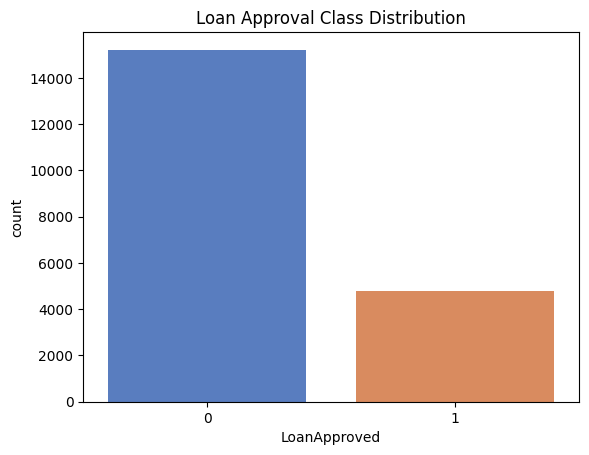

In [ ]:
# Plot target variable distribution
sns.countplot(data=eda_data, x='LoanApproved', palette='muted')
plt.title("Loan Approval Class Distribution")
plt.show()

In [ ]:
class_counts = eda_data['LoanApproved'].value_counts(normalize=True)
print(class_counts)


LoanApproved
0    0.761
1    0.239
Name: proportion, dtype: float64


If one class represents more than 70-80% of the dataset, imbalance needs attention.

So, here the dataset was imbalanced.

# **Resampling the Dataset**

**1. Oversampling the Minority Class**

The **SMOTE** (Synthetic Minority Oversampling Technique) is commonly used for oversampling. It generates synthetic samples for the minority class to balance the dataset.



In [ ]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Perform oversampling on selected features and target
X_resampled, y_resampled = smote.fit_resample(X[selected_features], y)

# Display new class distribution
from collections import Counter
print("Resampled Class Distribution:", Counter(y_resampled))


Resampled Class Distribution: Counter({0: 15220, 1: 15220})


The result Counter({0: 15220, 1: 15220}) means that the classes in your dataset are now perfectly balanced after applying oversampling:

The majority class (0, "Not Approved") has 15,220 samples.
The minority class (1, "Approved") also now has 15,220 samples after synthetic samples were generated using the SMOTE technique.

**2. Undersampling the Majority Class**

With **Random Under-Sampling**, instances from the majority class are randomly removed to match the size of the minority class.

In [ ]:
from imblearn.under_sampling import RandomUnderSampler

# Instantiate RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Perform undersampling
X_resampled, y_resampled = rus.fit_resample(X[selected_features], y)

# Display new class distribution
print("Resampled Class Distribution:", Counter(y_resampled))


Resampled Class Distribution: Counter({0: 4780, 1: 4780})


The result Counter({0: 4780, 1: 4780}) means that after applying undersampling, the classes in your dataset are now perfectly balanced, but with fewer total samples:

The majority class (0, "Not Approved") was randomly reduced to 4,780 samples.
The minority class (1, "Approved") remains at 4,780 samples (its original size was smaller, so no reduction happened).


**3. Combination of Over and Under Sampling**

A combination of oversampling and undersampling (e.g., SMOTEENN) can improve performance by addressing both overfitting to synthetic samples and redundancy in the majority class.

In [ ]:
from imblearn.combine import SMOTEENN

# Instantiate SMOTEENN
smoteenn = SMOTEENN(random_state=42)

# Perform combined resampling
X_resampled, y_resampled = smoteenn.fit_resample(X[selected_features], y)

# Display new class distribution
print("Resampled Class Distribution:", Counter(y_resampled))


Resampled Class Distribution: Counter({1: 12656, 0: 11644})


# **Verifying the Resampling**

After applying resampling, visualize the new distribution of the target variable

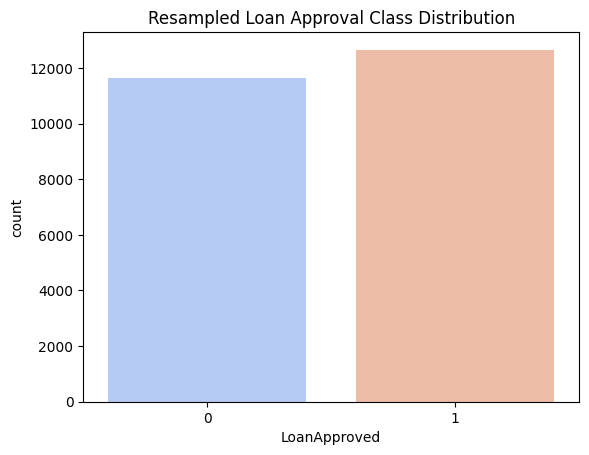

In [ ]:
# Visualize the new target distribution
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=y_resampled, palette='coolwarm')
plt.title("Resampled Loan Approval Class Distribution")
plt.show()


This balance is achieved by increasing the minority class samples (via synthetic generation) and reducing some samples from the majority class (by removing redundant/noisy data).


# **4. Analyze Feature Distributions**
Visualize the distributions of numeric features to identify skewness, outliers, and patterns.

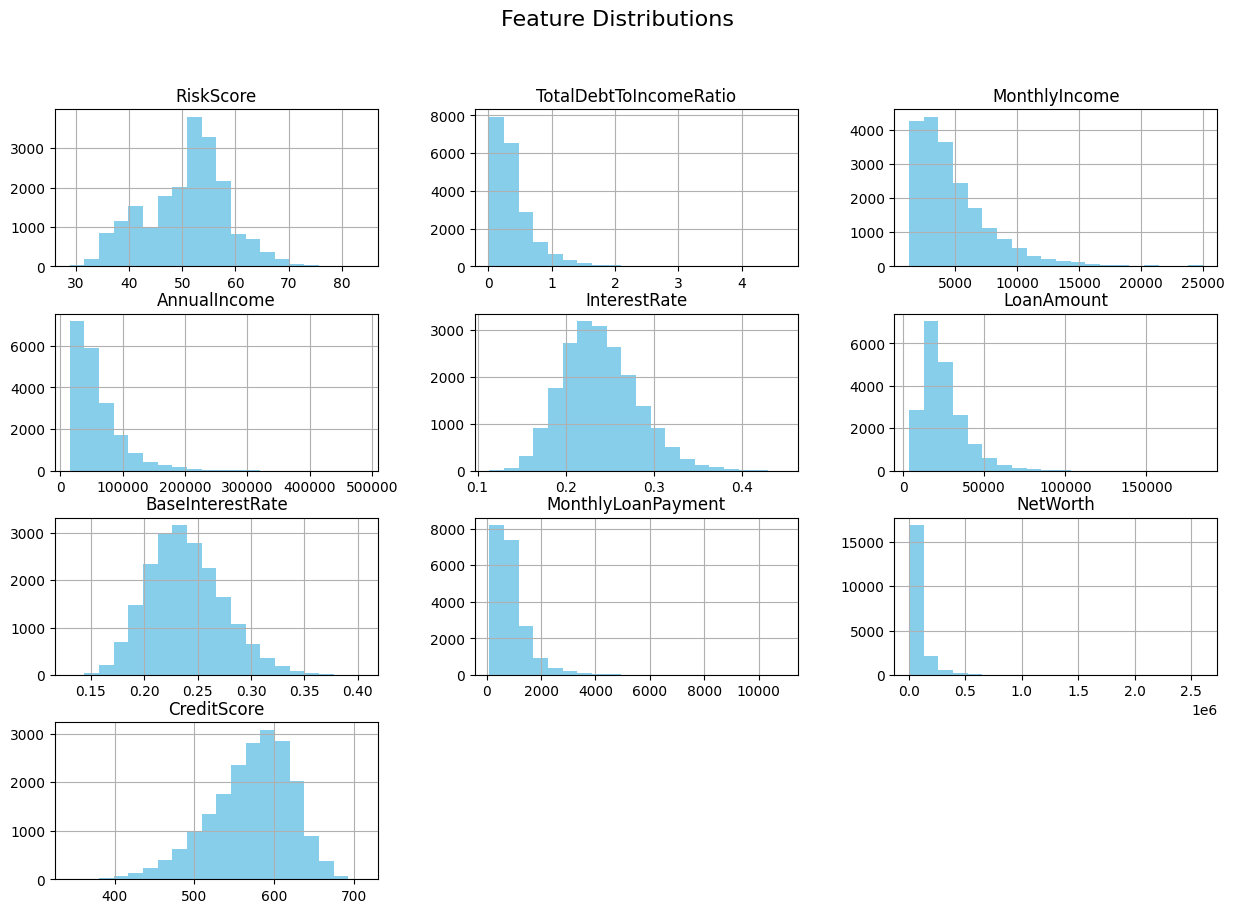

In [ ]:
# Plot distributions for numeric features
eda_data[selected_features].hist(figsize=(15, 10), bins=20, color='skyblue')
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()


# **5. Outlier Analysis**
Identify and handle outliers using boxplots.

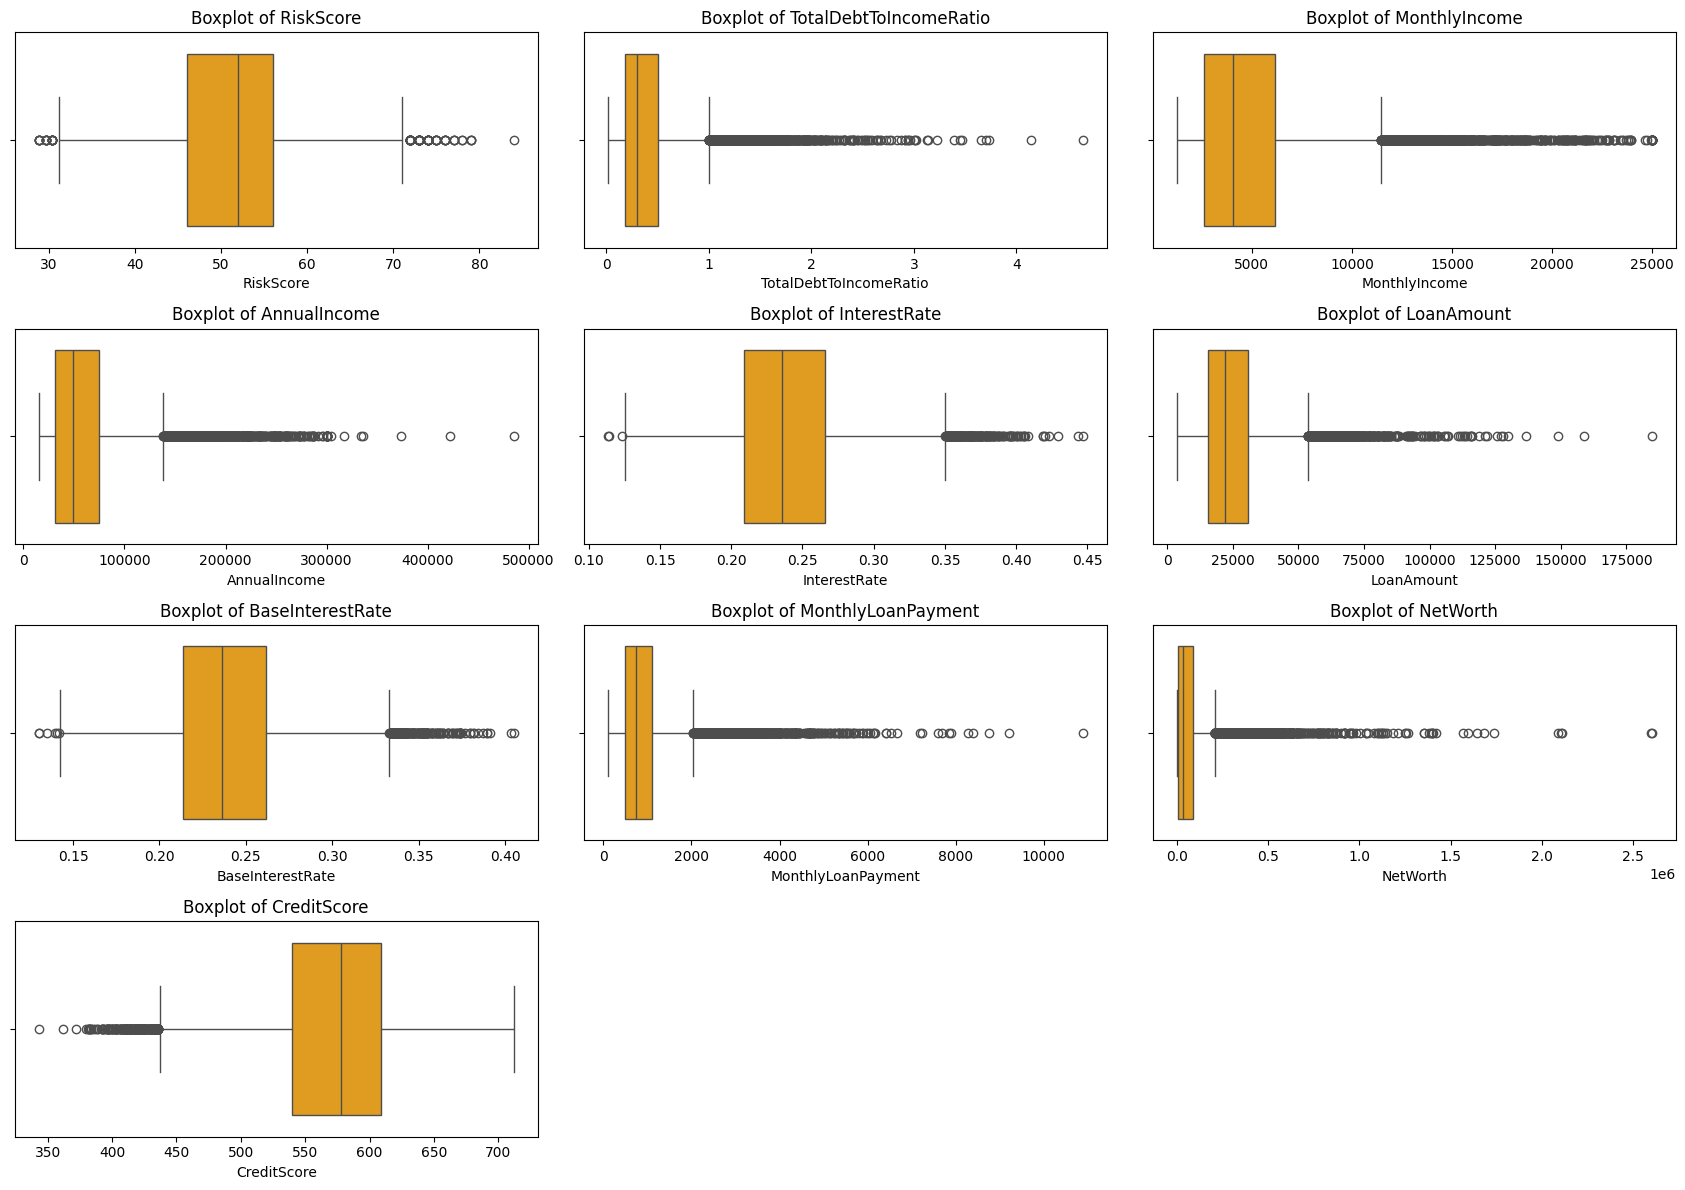

In [ ]:
#Boxplots to Identify Outliers
plt.figure(figsize=(17, 12))
for i, feature in enumerate(selected_features, 1):
    plt.subplot(4, 3, i)
    # Corrected line: Pass the specific feature column for x
    sns.boxplot(x=eda_data[feature], color='orange')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()

**There are many outliers in my dataset , but I'm preserving it**

**Justification for Preserving Outliers:**

**Real-World Relevance:**

Outliers in financial datasets often represent extreme cases, such as high-income individuals, large loan amounts. These are not errors but valid and significant data points that reflect real-world scenarios.

**Outliers in financial data are real and represent unique customers, like high-income earners or big loans, which are important for analysis.**

**Model Robustness:**

Modern machine learning models like Random Forest, XGBoost, or LightGBM are inherently robust to outliers. By preserving outliers, you leverage the full spectrum of data to train models that generalize better in real-world scenarios.

**Removing them can make models less accurate since they won’t learn from the full range of data.**

**Business Insight:**

Outliers help identify high-risk or high-value customers, which are critical for making informed decisions.

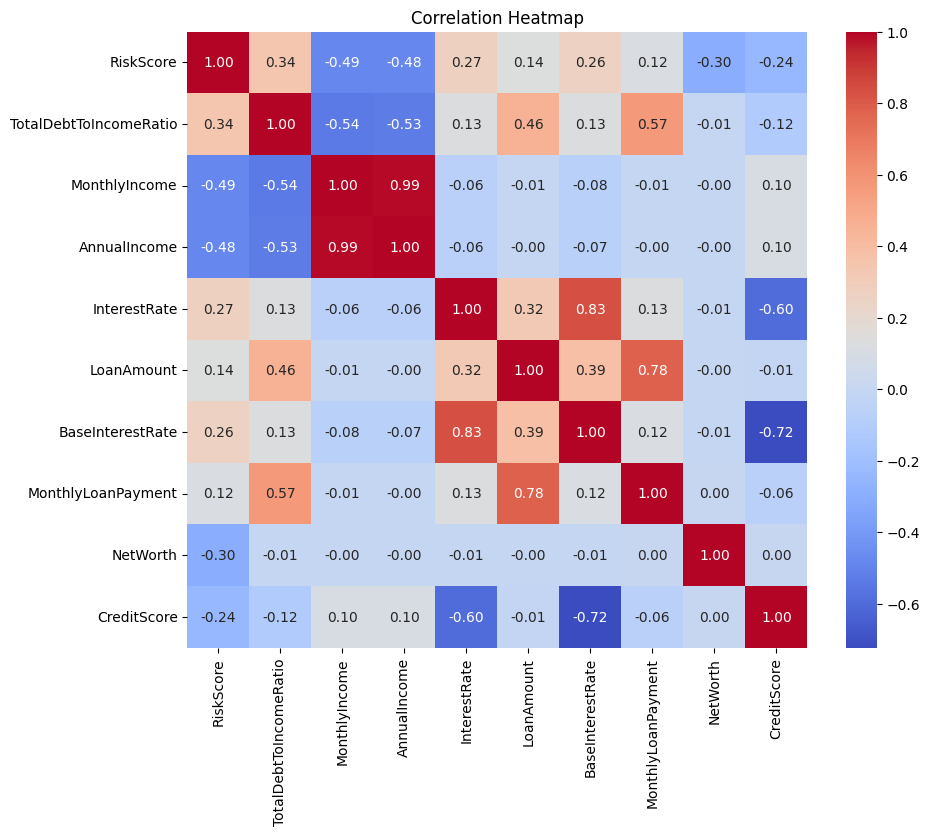

In [ ]:
#Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(eda_data[selected_features].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Note: Removing features may lead to loss of information so consider the impact on the model's predictive power.

# **Interpretation of the Correlation Heatmap:**

**Strong Correlation Between MonthlyIncome and AnnualIncome (0.99):**
These features are nearly identical and provide the same information. While Random Forest can handle this redundancy

**Strong Correlation Between BaseInterestRate and InterestRate (0.83):**
This indicates that the InterestRate might already account for variations in the BaseInterestRate, so both features may not provide entirely unique value. However, keeping both won't harm your model.

**Moderate Correlation Between LoanAmount and MonthlyLoanPayment (0.78):**
This is a logical correlation since larger loans generally lead to higher monthly payments. These features can complement each other in the model.

**Weak Correlations with Features Like CreditScore and NetWorth:**
These features are less correlated with others, which is good because they may add independent predictive power to your model.

# **Model Building**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)



# **Evaluating the Model**

Accuracy: 0.9965020576131687
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2336
           1       0.99      1.00      1.00      2524

    accuracy                           1.00      4860
   macro avg       1.00      1.00      1.00      4860
weighted avg       1.00      1.00      1.00      4860



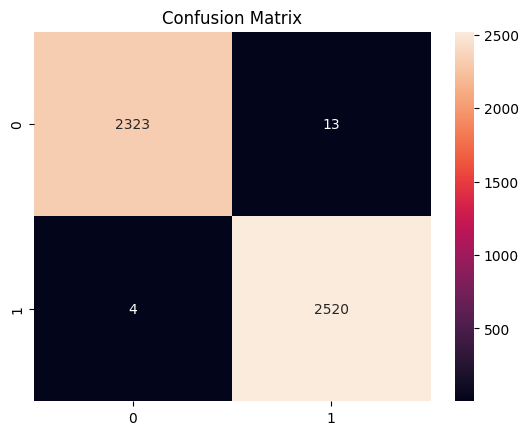

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.show()

The model performed exceptionally well, with minimal misclassifications (only 17 out of 4,860 samples were incorrect).
Features like CreditScore, AnnualIncome, DebtToIncomeRatio, and LoanAmount likely contributed significantly to the model's success.

**Conclusion:**

This model is highly reliable for predicting loan approval and can assist financial institutions in making informed decisions with minimal risk of error.

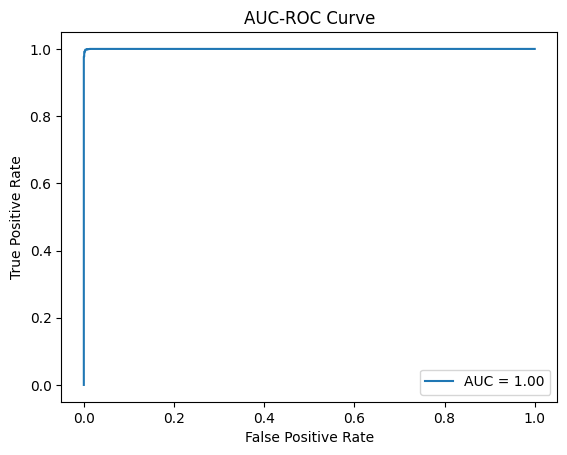

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

y_prob = rf_classifier.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_prob)
fpr, tpr, _ = roc_curve(y_test, y_prob)

plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.title("AUC-ROC Curve")
plt.show()


**The curve is almost perfect, hugging the top-left corner, which means the model is performing exceptionally well.**

AUC (Area Under the Curve) = **1.00 indicates perfect classification** performance with no errors. A score of 1 means the model is excellent at distinguishing between positive and negative classes.

**Feature Importance:**

Checking feature importance from the model to verify that your selected features are relevant

In [ ]:
feature_importances = rf_classifier.feature_importances_
for name, importance in zip(selected_features, feature_importances):
    print(f"{name}: {importance:.2f}")


RiskScore: 0.50
TotalDebtToIncomeRatio: 0.20
MonthlyIncome: 0.11
AnnualIncome: 0.11
InterestRate: 0.02
LoanAmount: 0.03
BaseInterestRate: 0.00
MonthlyLoanPayment: 0.01
NetWorth: 0.02
CreditScore: 0.00


**Verifying the model with new data point**

In [ ]:

# Create a new data point
new_data_point = pd.DataFrame({
    'RiskScore': [55],
    'TotalDebtToIncomeRatio': [0.4],
    'MonthlyIncome': [6000],
    'AnnualIncome': [72000],
    'InterestRate': [0.05],
    'LoanAmount': [20000],
    'BaseInterestRate': [0.04],
    'MonthlyLoanPayment': [400],
    'NetWorth': [100000],
    'CreditScore': [750]
})

# Make a prediction using your trained model
new_prediction = rf_classifier.predict(new_data_point)

# Print the prediction
print(f"Prediction for the new data point: {new_prediction[0]}")


#Probability of the prediction
new_prediction_probability = rf_classifier.predict_proba(new_data_point)
print(f"Prediction probabilities for the new data point: {new_prediction_probability}")

Prediction for the new data point: 0
Prediction probabilities for the new data point: [[0.86 0.14]]
